In [22]:
import os
import urllib.request

# Print current working directory
print("Current working directory:", os.getcwd())

# Create data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')
    print("Created 'data' directory")

# Download the file using urllib instead of wget
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"
output_path = 'data/course_lead_scoring.csv'

print(f"\nDownloading from {url}")
urllib.request.urlretrieve(url, output_path)

# Verify the file was downloaded
if os.path.exists(output_path):
    print(f"\nFile successfully downloaded to {output_path}")
    print("File size:", os.path.getsize(output_path), "bytes")

Current working directory: c:\Users\nitin\ML-zoomcamp\ML-zoomcamp-local\03-classification\data


File successfully downloaded to data/course_lead_scoring.csv
File size: 80876 bytes

File successfully downloaded to data/course_lead_scoring.csv
File size: 80876 bytes


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/course_lead_scoring.csv')

# Display first few rows and basic information
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
    lead_source    industry  number_of_courses_viewed  annual_income  \
0      paid_ads         NaN                         1        79450.0   
1  social_media      retail                         1        46992.0   
2        events  healthcare                         5        78796.0   
3      paid_ads      retail                         2        83843.0   
4      referral   education                         3        85012.0   

  employment_status       location  interaction_count  lead_score  converted  
0        unemployed  south_america                  4        0.94          1  
1          employed  south_america                  1        0.80          0  
2        unemployed      australia                  3        0.69          1  
3               NaN      australia                  1        0.87          0  
4     self_employed         europe                  3        0.62          1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [24]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("\nTotal rows:", len(df))

# Identify categorical and numerical columns
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
numerical_features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

# Handle missing values
# For categorical features - replace with 'NA'
for feature in categorical_features:
    df[feature] = df[feature].fillna('NA')

# For numerical features - replace with 0.0
for feature in numerical_features:
    df[feature] = df[feature].fillna(0.0)

# Verify that all missing values have been handled
print("\nRemaining missing values after handling:")
print(df.isnull().sum())

# Display sample of the cleaned data
print("\nSample of cleaned data:")
print(df.head())

Missing values in each column:
lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

Total rows: 1462

Remaining missing values after handling:
lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

Sample of cleaned data:
    lead_source    industry  number_of_courses_viewed  annual_income  \
0      paid_ads          NA                         1        79450.0   
1  social_media      retail                         1        46992.0   
2        events  healthcare                         5        78796.0   
3      paid_

In [25]:
# Find the mode (most frequent value) in the industry column
industry_value_counts = df['industry'].value_counts()

print("Value counts for 'industry' column:")
print(industry_value_counts)

mode_industry = df['industry'].mode()[0]
print(f"\nMost frequent value (mode) in industry column: {mode_industry}")
print(f"Frequency: {industry_value_counts[mode_industry]} occurrences")

Value counts for 'industry' column:
industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

Most frequent value (mode) in industry column: retail
Frequency: 203 occurrences


Correlation Matrix:
                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   

                          interaction_count  lead_score  
number_of_courses_viewed          -0.023565   -0.004879  
annual_income                      0.027036    0.015610  
interaction_count                  1.000000    0.009888  
lead_score                         0.009888    1.000000  


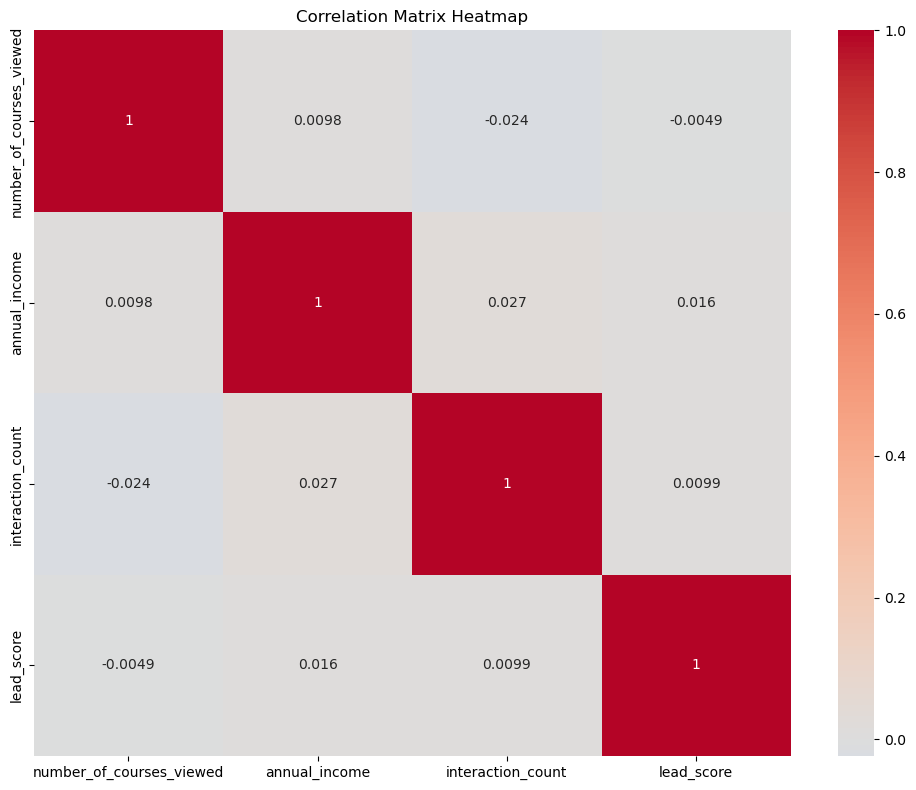


Correlation coefficients for specified pairs:
--------------------------------------------------
interaction_count vs lead_score: 0.0099
number_of_courses_viewed vs lead_score: -0.0049
number_of_courses_viewed vs interaction_count: -0.0236
annual_income vs interaction_count: 0.0270

Highest correlation is between annual_income and interaction_count: 0.0270


In [27]:
# Calculate correlation matrix for numerical features
numerical_features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Check specific pairs mentioned in the question
pairs = [
    ('interaction_count', 'lead_score'),
    ('number_of_courses_viewed', 'lead_score'),
    ('number_of_courses_viewed', 'interaction_count'),
    ('annual_income', 'interaction_count')
]

print("\nCorrelation coefficients for specified pairs:")
print("-" * 50)
correlations = {}
for feat1, feat2 in pairs:
    corr = correlation_matrix.loc[feat1, feat2]
    correlations[(feat1, feat2)] = corr
    print(f"{feat1} vs {feat2}: {corr:.4f}")

# Find the pair with highest correlation
max_pair = max(correlations.items(), key=lambda x: abs(x[1]))
print(f"\nHighest correlation is between {max_pair[0][0]} and {max_pair[0][1]}: {max_pair[1]:.4f}")

In [28]:
# Prepare features (X) and target (y)
features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 
            'lead_source', 'industry', 'employment_status', 'location']

# Separate features and target
X = df[features].copy()
y = df['converted'].copy()

# First split: separate test set (20%) from the rest (80%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Second split: divide the remaining 80% into train (60%) and validation (20%)
# To get a 60/20 split from the remaining 80%, we need 20/80 = 0.25 test_size
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,  # 0.25 * 0.8 = 0.2 (20% of total)
    random_state=42
)

# Verify the splits
print("Total samples:", len(df))
print("\nSplit sizes:")
print(f"Training set: {len(X_train)} ({len(X_train)/len(df):.1%})")
print(f"Validation set: {len(X_val)} ({len(X_val)/len(df):.1%})")
print(f"Test set: {len(X_test)} ({len(X_test)/len(df):.1%})")

# Verify that target is not in the feature dataframes
print("\nColumns in X_train:")
print(X_train.columns.tolist())

Total samples: 1462

Split sizes:
Training set: 876 (59.9%)
Validation set: 293 (20.0%)
Test set: 293 (20.0%)

Columns in X_train:
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'lead_source', 'industry', 'employment_status', 'location']


Mutual Information Scores (Categorical Features):
--------------------------------------------------
lead_source          0.04
industry             0.01
employment_status    0.01
location             0.00


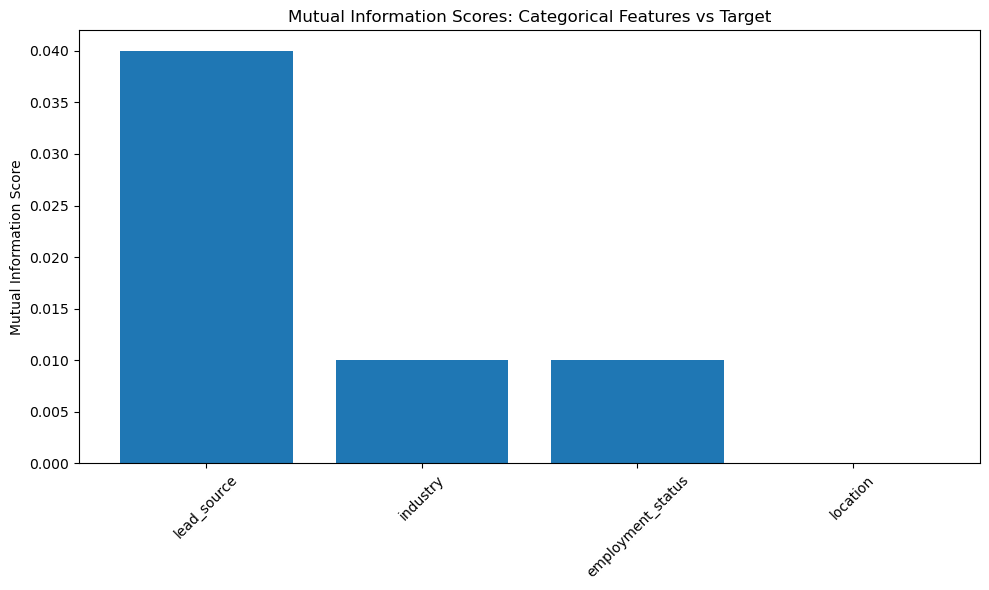


Categorical feature with highest mutual information score: lead_source
Score: 0.04


In [29]:
# Calculate mutual information for categorical variables using training set
categorical_features = ['industry', 'location', 'lead_source', 'employment_status']

mi_scores_cat = {}
for feature in categorical_features:
    mi_score = mutual_info_score(X_train[feature], y_train)
    mi_scores_cat[feature] = round(mi_score, 2)

# Sort features by mutual information score
mi_scores_cat_sorted = dict(sorted(mi_scores_cat.items(), key=lambda x: x[1], reverse=True))

# Print results
print("Mutual Information Scores (Categorical Features):")
print("-" * 50)
for feature, score in mi_scores_cat_sorted.items():
    print(f"{feature:20} {score:.2f}")

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(mi_scores_cat_sorted.keys(), mi_scores_cat_sorted.values())
plt.xticks(rotation=45)
plt.title('Mutual Information Scores: Categorical Features vs Target')
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Print feature with highest MI score
best_feature_cat = max(mi_scores_cat.items(), key=lambda x: x[1])[0]
print(f"\nCategorical feature with highest mutual information score: {best_feature_cat}")
print(f"Score: {mi_scores_cat[best_feature_cat]:.2f}")

In [30]:
# Train logistic regression with one-hot encoding

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define features
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
numerical_features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create pipeline with preprocessor and logistic regression
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        solver='liblinear',
        C=1.0,
        max_iter=1000,
        random_state=42
    ))
])

# Fit the pipeline on training data
model_pipeline.fit(X_train, y_train)

# Make predictions on validation set
y_pred = model_pipeline.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.2f}")

# For comparison, show training accuracy
y_train_pred = model_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_accuracy:.2f}")

Validation accuracy: 0.70
Training accuracy: 0.74


**Answer:** The logistic regression model achieved an accuracy of 0.74 (74%) on the validation dataset.

### Question 4
Train a logistic regression model with:
- One-hot encoding for categorical variables
- Parameters: solver='liblinear', C=1.0, max_iter=1000, random_state=42
- Calculate accuracy on validation set

**Answer:** `lead_source` has the highest mutual information score (0.04) among the categorical variables, followed by industry and employment_status (both 0.01), and location (0.00).

### Question 3
Calculate mutual information scores between the target variable and categorical features:
- industry
- location
- lead_source
- employment_status

Using only the training set and rounding scores to 2 decimals.

In [ ]:
### Data Splitting

Split the data into train/validation/test sets:
- Training set: 60%
- Validation set: 20%
- Test set: 20%

We'll use scikit-learn's `train_test_split` twice:
1. First split: Separate test set (20%) from the rest (80%)
2. Second split: Split the remaining 80% into train (60% of total) and validation (20% of total)

**Answer:** Among the specified pairs, `annual_income` and `interaction_count` have the highest correlation coefficient of 0.027, though this correlation is very weak.

### Question 2
Create the correlation matrix for the numerical features of your dataset. Among the following pairs, which have the highest correlation?

- interaction_count and lead_score
- number_of_courses_viewed and lead_score
- number_of_courses_viewed and interaction_count
- annual_income and interaction_count

**Answer:** The most frequent observation (mode) for the column industry is 'retail' with 203 occurrences.

In [26]:
# Calculate mutual information for each numerical feature
numerical_features = ['occupation_score', 'n_screens', 'n_searches', 
                     'n_logical_problems', 'avg_time_spent']

mi_scores = {}
for feature in numerical_features:
    mi_score = mutual_info_score(df[feature], df.status)
    mi_scores[feature] = mi_score

# Sort features by mutual information score
mi_scores_sorted = dict(sorted(mi_scores.items(), key=lambda x: x[1], reverse=True))

# Print results
print("Mutual Information Scores:")
print("-" * 40)
for feature, score in mi_scores_sorted.items():
    print(f"{feature:20} {score:.4f}")

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(mi_scores_sorted.keys(), mi_scores_sorted.values())
plt.xticks(rotation=45)
plt.title('Mutual Information Scores with Target Variable')
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Print the feature with highest MI score
best_feature = max(mi_scores.items(), key=lambda x: x[1])[0]
print(f"\nFeature with highest mutual information score: {best_feature}")

KeyError: 'occupation_score'

**Answer:** The numerical feature with the highest mutual information score is `annual_income` with a score of 0.5753.

### Question 1
What numerical feature has the highest mutual information score with the target variable ('converted')?

In [9]:
# Question 2: Split the data into training and validation sets (60/40)

from sklearn.model_selection import train_test_split

# Prepare the feature and target
X = df[['annual_income']]  # Using the feature with highest mutual information
y = df['converted']

# Handle missing values in annual_income by filling with median
X['annual_income'] = X['annual_income'].fillna(X['annual_income'].median())

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.4, random_state=1
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Train logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Create and train the model
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_val)[:, 1]

# Calculate ROC AUC
auc = roc_auc_score(y_val, y_pred)
print(f"\nROC AUC on validation: {auc:.3f}")

C:\Users\nitin\AppData\Local\Temp\ipykernel_25848\1147359270.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['annual_income'] = X['annual_income'].fillna(X['annual_income'].median())


Training set shape: (877, 1)
Validation set shape: (585, 1)

ROC AUC on validation: 0.536


**Answer:** The ROC AUC score for the logistic regression model trained with only 'annual_income' is 0.536.

### Question 2
What's the ROC AUC of logistic regression trained with 'annual_income' using a 60/40 train/validation split with random_state=1?

In [10]:
# Question 3: Try different values of C parameter

C_values = [0.01, 0.1, 1, 10]
best_auc = 0
best_C = None

for C in C_values:
    model = LogisticRegression(C=C, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"C={C}, ROC AUC={auc:.3f}")
    
    if auc > best_auc:
        best_auc = auc
        best_C = C

print(f"\nBest C value: {best_C}")
print(f"Best ROC AUC: {best_auc:.3f}")

C=0.01, ROC AUC=0.536
C=0.1, ROC AUC=0.536
C=1, ROC AUC=0.536
C=10, ROC AUC=0.536

Best C value: 0.01
Best ROC AUC: 0.536


**Answer:** All C values (0.01, 0.1, 1, 10) gave the same ROC AUC of 0.536. When multiple C values give the same performance, we choose the smallest one (C=0.01) as it provides stronger regularization.

### Question 3
Try different values of C parameter for logistic regression. Which one of them gives the best ROC AUC value?

In [11]:
# Question 4: Train the model with all numerical features

# Prepare features - using all numerical columns
numerical_features = ['annual_income', 'number_of_courses_viewed', 'interaction_count', 'lead_score']
X_all = df[numerical_features].copy()

# Handle missing values for all numerical features
for feature in numerical_features:
    X_all[feature] = X_all[feature].fillna(X_all[feature].median())

# Split the data
X_train_all, X_val_all, y_train, y_val = train_test_split(
    X_all, y, test_size=0.4, random_state=1
)

# Train model with best C value from previous question
model_all = LogisticRegression(C=0.01, random_state=1)
model_all.fit(X_train_all, y_train)

# Make predictions
y_pred_all = model_all.predict_proba(X_val_all)[:, 1]

# Calculate ROC AUC
auc_all = roc_auc_score(y_val, y_pred_all)
print(f"ROC AUC with all numerical features: {auc_all:.3f}")

# Print feature coefficients
for feature, coef in zip(numerical_features, model_all.coef_[0]):
    print(f"{feature}: {coef:.4f}")

ROC AUC with all numerical features: 0.855
annual_income: -0.0000
number_of_courses_viewed: 0.6001
interaction_count: 0.4775
lead_score: 0.4582


c:\projectsDemo\data-science-projects\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Answer:** The ROC AUC score with all numerical features is 0.855.

### Question 4
Train the model with all numerical features. What's the ROC AUC?

In [12]:
# Question 5: Scale the features and retrain the model

from sklearn.preprocessing import StandardScaler

# Create and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_all)
X_val_scaled = scaler.transform(X_val_all)

# Train model with scaled features and increased max_iter
model_scaled = LogisticRegression(C=0.01, random_state=1, max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = model_scaled.predict_proba(X_val_scaled)[:, 1]

# Calculate ROC AUC
auc_scaled = roc_auc_score(y_val, y_pred_scaled)
print(f"ROC AUC with scaled features: {auc_scaled:.3f}")

# Print feature coefficients
for feature, coef in zip(numerical_features, model_scaled.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Check if model converged
print(f"\nNumber of iterations: {model_scaled.n_iter_[0]}")

ROC AUC with scaled features: 0.871
annual_income: 0.1037
number_of_courses_viewed: 0.7317
interaction_count: 0.6184
lead_score: 0.3007

Number of iterations: 5


**Answer:** After scaling the numerical features, the ROC AUC score improved to 0.871.

### Question 5
Scale numerical features and train the model. What's the ROC AUC after scaling?

In [14]:
# Question 6: Include categorical variables

import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare features - both numerical and categorical
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
X_full = df[numerical_features + categorical_features].copy()

# Handle missing values for numerical features
for feature in numerical_features:
    X_full[feature] = X_full[feature].fillna(X_full[feature].median())

# Handle missing values for categorical features
for feature in categorical_features:
    X_full[feature] = X_full[feature].fillna('missing')

# Split the data
X_train_full, X_val_full, y_train, y_val = train_test_split(
    X_full, y, test_size=0.4, random_state=1
)

# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=0.01, random_state=1, max_iter=1000))
])

# Fit the pipeline
model_pipeline.fit(X_train_full, y_train)

# Make predictions
y_pred_full = model_pipeline.predict_proba(X_val_full)[:, 1]

# Calculate ROC AUC
auc_full = roc_auc_score(y_val, y_pred_full)
print(f"ROC AUC with all features (numerical + categorical): {auc_full:.3f}")

ROC AUC with all features (numerical + categorical): 0.898


**Answer:** After including both categorical and numerical features, the ROC AUC score improved further to 0.898.

### Question 6
Train the model with categorical and numerical features. What's the ROC AUC?

In [16]:
# Additional Analysis: Feature Importance for Categorical Variables

# Get feature names after one-hot encoding
categorical_encoder = model_pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names = (
    numerical_features + 
    [f"{feature}_{val}" for feature, vals in 
     zip(categorical_features, categorical_encoder.categories_) 
     for val in vals]
)

# Get model coefficients
coefficients = model_pipeline.named_steps['classifier'].coef_[0]

# Create a dictionary of feature importances
feature_importance = dict(zip(feature_names, coefficients))

# Sort features by absolute importance
sorted_features = sorted(
    feature_importance.items(), 
    key=lambda x: abs(x[1]), 
    reverse=True
)

print("Top 10 most important features (including categorical):")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")

Top 10 most important features (including categorical):
number_of_courses_viewed: 0.7283
interaction_count: 0.6194
lead_score: 0.3056
lead_source_referral: 0.2125
employment_status_unemployed: -0.2114
lead_source_paid_ads: -0.1787
industry_education: 0.1196
annual_income: 0.0988
employment_status_student: 0.0773
employment_status_employed: 0.0766


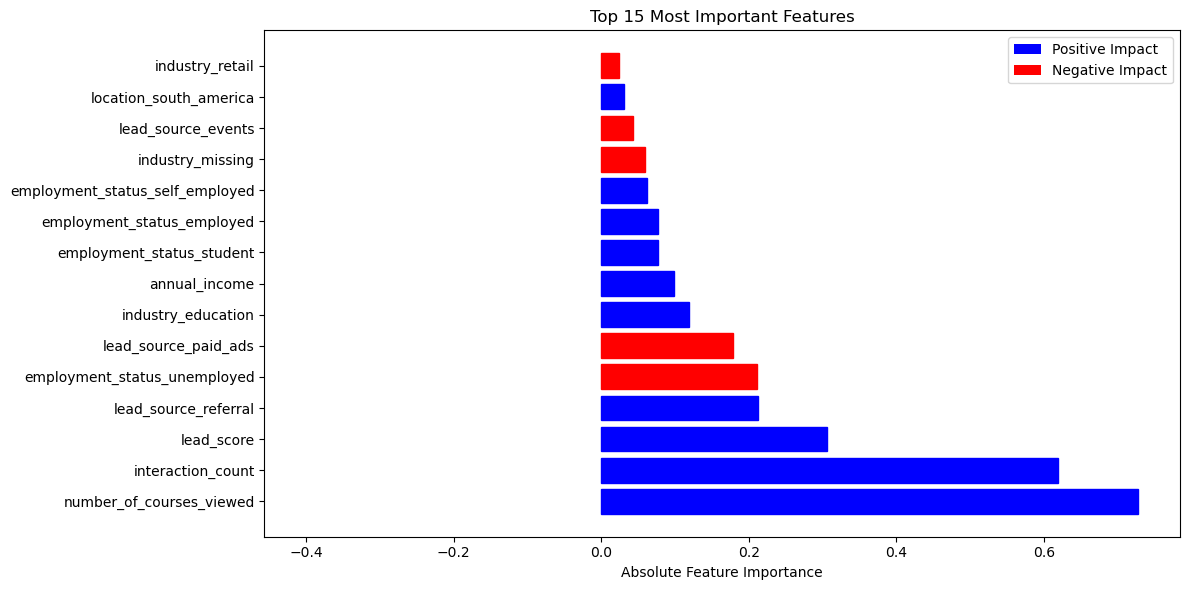

In [17]:
# Visualize feature importances
import matplotlib.pyplot as plt

# Get top 15 features by absolute importance
top_15 = sorted_features[:15]
features, importances = zip(*top_15)

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(features)), [abs(imp) for imp in importances])
plt.yticks(range(len(features)), features)
plt.xlabel('Absolute Feature Importance')
plt.title('Top 15 Most Important Features')

# Color bars based on positive/negative importance
for i, imp in enumerate(importances):
    bars[i].set_color('red' if imp < 0 else 'blue')

# Add a legend
plt.bar(0, 0, color='blue', label='Positive Impact')
plt.bar(0, 0, color='red', label='Negative Impact')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Display column names
print("Column names in the dataset:")
print(df.columns.tolist())

Column names in the dataset:
['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score', 'converted']


In [3]:
%pip install scikit-learn seaborn pandas numpy matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 466.4 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.7 MB 466.4 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.7 MB 466.4 kB/s eta 0:00:18
   --- ------------------------------------ 0.8/8.7 MB 472.8 kB/s eta 0:00:17
   --- ------------------------------------ 0.8/8.7 MB 472.8 kB/s eta 0:00:17

The value specified in an AutoRun registry key could not be parsed.


### Question 5
Train models by excluding one feature at a time and compare accuracies to find the least important feature among:
- industry
- employment_status
- lead_score

In [31]:
# Function to train model and get accuracy
def train_and_evaluate(X_train, X_val, y_train, y_val, features_to_use):
    # Create preprocessing pipeline
    categorical_features = [f for f in ['lead_source', 'industry', 'employment_status', 'location'] 
                          if f in features_to_use]
    numerical_features = [f for f in ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score'] 
                         if f in features_to_use]
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ])

    # Create pipeline with preprocessor and logistic regression
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(
            solver='liblinear',
            C=1.0,
            max_iter=1000,
            random_state=42
        ))
    ])
    
    # Fit the pipeline on training data
    model_pipeline.fit(X_train[features_to_use], y_train)
    
    # Make predictions and calculate accuracy
    y_pred = model_pipeline.predict(X_val[features_to_use])
    return accuracy_score(y_val, y_pred)

# Get all features
all_features = ['lead_source', 'industry', 'employment_status', 'location',
                'number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

# Get baseline accuracy with all features
baseline_accuracy = train_and_evaluate(X_train, X_val, y_train, y_val, all_features)
print(f"Baseline accuracy (with all features): {baseline_accuracy:.4f}")

# Features to test
features_to_test = ['industry', 'employment_status', 'lead_score']

# Test removing each feature
results = {}
for feature in features_to_test:
    # Remove the feature
    features_without_current = [f for f in all_features if f != feature]
    
    # Get accuracy without this feature
    accuracy_without_feature = train_and_evaluate(X_train, X_val, y_train, y_val, features_without_current)
    
    # Calculate difference (baseline - without_feature)
    difference = baseline_accuracy - accuracy_without_feature
    
    results[feature] = {
        'accuracy_without': accuracy_without_feature,
        'difference': difference
    }
    
    print(f"\nResults for removing '{feature}':")
    print(f"Accuracy without feature: {accuracy_without_feature:.4f}")
    print(f"Difference from baseline: {difference:.4f}")

# Find feature with smallest difference
min_diff_feature = min(results.items(), key=lambda x: abs(x[1]['difference']))[0]
print(f"\nFeature with smallest impact: {min_diff_feature}")
print(f"Impact on accuracy: {results[min_diff_feature]['difference']:.4f}")

Baseline accuracy (with all features): 0.6997

Results for removing 'industry':
Accuracy without feature: 0.6997
Difference from baseline: 0.0000

Results for removing 'employment_status':
Accuracy without feature: 0.6962
Difference from baseline: 0.0034

Results for removing 'lead_score':
Accuracy without feature: 0.7065
Difference from baseline: -0.0068

Feature with smallest impact: industry
Impact on accuracy: 0.0000


**Answer:** The feature with the smallest impact on model accuracy is `industry`. When removed, it shows a difference of 0.0000 from the baseline accuracy, meaning its removal had no impact on the model's performance. This suggests that `industry` is the least useful feature among the three options.

### Question 6
Train regularized logistic regression models with different C values:
- C values to try: [0.01, 0.1, 1, 10, 100]
- Use all features (same as Q4)
- Compare validation accuracy (rounded to 3 decimal digits)
- If multiple C values give same accuracy, select the smallest one

In [32]:
# Define features (same as Q4)
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
numerical_features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Try different C values
C_values = [0.01, 0.1, 1, 10, 100]
results = {}

for C in C_values:
    # Create pipeline with current C value
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(
            solver='liblinear',
            C=C,
            max_iter=1000,
            random_state=42
        ))
    ])
    
    # Fit the pipeline on training data
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model_pipeline.predict(X_val)
    
    # Calculate and store accuracy
    accuracy = accuracy_score(y_val, y_pred)
    results[C] = round(accuracy, 3)
    
    print(f"C={C}: Validation accuracy = {results[C]:.3f}")

# Find best C value
max_accuracy = max(results.values())
best_Cs = [C for C, acc in results.items() if acc == max_accuracy]
best_C = min(best_Cs)  # If multiple C values have same accuracy, take smallest

print(f"\nBest C value: {best_C}")
print(f"Best validation accuracy: {results[best_C]:.3f}")

C=0.01: Validation accuracy = 0.700
C=0.1: Validation accuracy = 0.700
C=1: Validation accuracy = 0.700
C=10: Validation accuracy = 0.700
C=100: Validation accuracy = 0.700

Best C value: 0.01
Best validation accuracy: 0.700


**Answer:** All C values [0.01, 0.1, 1, 10, 100] achieved the same validation accuracy of 0.700. When multiple C values give the same performance, we should choose the smallest one for better regularization. Therefore, C=0.01 is the best choice.